# New RedBkg Analyzer

## Use Filippo's 2018 Data to identify all 2P2+F and 3P1+F CRs.

- [ ] Count all such events.
- [ ] Make TH2 dists for all types.
- [ ] Create new root file with new branches (is2P2F, is3P1F, is4P0F)
   - [ ] Maybe use enums?

In [ ]:
import os
# import sys
from pprint import pprint
from ROOT import TFile, TCanvas, Math, TPaveText, gStyle, gPad
import numpy as np
# top_dir = "/blue/avery/rosedj1/"

# from Utils_ROOT.Printer import CanvasPrinter
# from Utils_Python.Plot_Styles_ROOT.tdrstyle_official import setTDRStyle, tdrGrid, fixOverlay

top_dir = "/cmsuf/data/store/user/t2/users/rosedj1"
sys.path.append(os.path.join(top_dir, "HiggsMassMeasurement"))
sys.path.append(os.path.join(top_dir, "ZplusXpython"))

Welcome to JupyROOT 6.20/04


In [12]:
def draw_th2(h2, as_percent=False, z_max=100000, selec=""):
    c = TCanvas()
    c.Draw()
    
    h2.GetXaxis().SetRangeUser(2, 5)
    h2.GetYaxis().SetRangeUser(0, 3)
    h2.GetXaxis().SetNdivisions(3)
    h2.GetYaxis().SetNdivisions(3)
    h2.GetXaxis().CenterLabels(True)
    h2.GetYaxis().CenterLabels(True)
    gStyle.SetOptStat(0)
    h2.SetContour(100)
    h2.GetZaxis().SetRangeUser(0, z_max)
    h2.Draw("colz text")
    if as_percent:
        gStyle.SetPaintTextFormat(".2f%%")
    else:
        gStyle.SetPaintTextFormat(".0f")

#         gStyle.SetPaintTextFormat(".2g%%")

    pave = make_pave(xmin=0.6, ymin=0.70, xmax=0.88, ymax=0.88)
    pave.SetTextSize(0.03)
    pave.AddText("Selection:")
    if selec.lower() in "cjlst":
        pave.AddText("HIG-19-001 OS Method")
        pave.AddText(r"n_{leps} = 4")
    elif selec.lower() in "relax":
        pave.AddText(r"n_{leps} = 4")
        pave.AddText(r"#sum(charge) = #sum(flavor) = 0")
        pave.AddText(r"m_{4l} > 70 GeV")
    pave.Draw("same")
    return c, pave

### CJLST Functions

In [ ]:
# def make_good_zz_cands(zcand_ls, make_ALL_pairs=False):
#     """Return a list of ZZCandidate objects that pass ZZ selections.
    
#     For signal region considerations:
#     From HIG-19-001 (EPJC) p.5:
#     If more than 1 ZZ candidate passes the selections:
#         if 2 ZZ candidates consist of the same 4 leptons:
#             keep the ZZ candidate whose Z1 mass is closer to the PDG Z mass.
#         otherwise:
#             keep the candidate with the highest value of the background
#             kinematic discriminant.
            
#     For RedBkg considerations, keep ALL ZZ candidates.
#     Each ZZ candidate can be a different contribution to a control region.
#     E.g.:
#         Suppose you have 5 leptons:
#             mu-  mu+  e-   e+   e2+
#             pass pass fail fail fail
#         There are 2 different 4l combinations that can give you a 2P2F event:
#             2P2Fa = mu-  mu+  e-   e+
#             2P2Fb = mu-  mu+  e-   e2+
#         2P2Fa is a ZZ candidate and 2P2Fb is a different ZZ candidate.
#         So we need to keep all ZZ candidates!
#     """
#     if make_ALL_pairs:
#         zz_pair_ls = make_all_zz_pairs(zcand_ls)
#     else:
#         zz_pair_ls = make_zz_pairs(zcand_ls)
#     zz_cand_ls = [zz for zz in zz_pair_ls if zz.check_passes_zz_selec()]
#     n_zz_cands = len(zz_cand_ls)
#     if n_zz_cands > 1:
#         # FIXME: Need to implement D_kin_bkg for different ZZ candidates.
#         print(f"[TESTING] Number of ZZ candidates found: {n_zz_cands}")
#         for zz in zz_cand_ls:
#             pprint(vars(zz))
#     return zz_cand_ls

# Comparing Event Selections

CJLST and BBF slightly differ in their RedBkg event selections.

## RedBkg Event Selection: CJLST

We are interested in comparing the "Really Relaxed Event Selection" with CJLST's RedBkg Event Selection.

- [ ] Make TH2 of number of loose leptons vs. number of tight leptons.
   - How do the number of events compare?

In [38]:
# With good smart cut.
# pprint(evt_info_d):
# {'n_evts_eq4_leps': 626767,
#  'n_evts_fail_zzcand': 0,
#  'n_evts_ge4_leps': 0,
#  'n_evts_lt2_zcand': 0,
#  'n_evts_lt2tightleps': 0,
#  'n_evts_lt4_leps': 0,
#  'n_evts_lt4tightpluslooseleps': 0,
#  'n_evts_ne2_zcand': 0,
#  'n_evts_ne4_leps': 7464896,
#  'n_evts_passedFullSelection': 2449,
#  'n_evts_passedZXCRSelection': 0,
#  'n_za_haslooseleps_whenfailsmartcut': 106,
#  'n_za_hastightleps_whenfailsmartcut': 68}

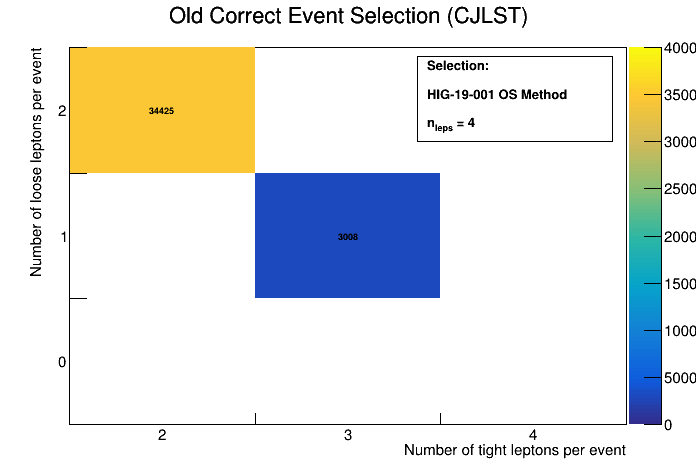

In [32]:
canv, pave = draw_th2(h2_nlooseleps_vs_ntightleps_evtsel_cjlst, as_percent=False, z_max=40000, selec="cjlst")

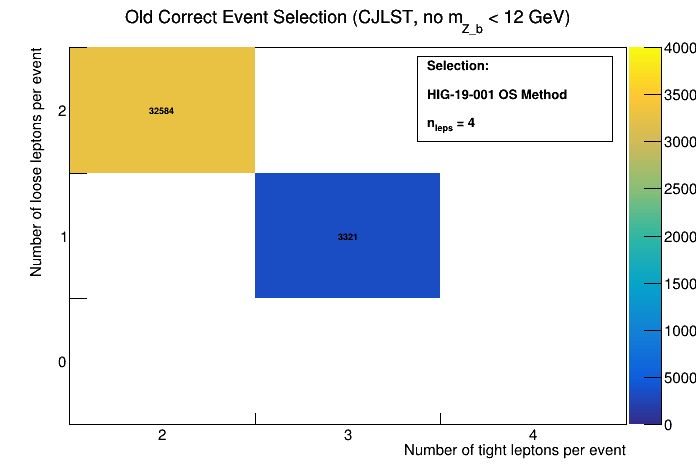

In [40]:
canv, pave = draw_th2(h2_nlooseleps_vs_ntightleps_evtsel_cjlst_badsmartcut, as_percent=False, z_max=40000, selec="cjlst")

In [ ]:
canv.Print("/cmsuf/data/store/user/t2/users/rosedj1/ZplusXpython/sidequests/data2018_h2_numlooseleps_vs_numtightleps_cjlstevtselec.pdf")

In [ ]:
# Scale by the number of events in Really Relaxed Event Selection.
h2_nlooseleps_vs_ntightleps_evtsel_cjlst = h2_nlooseleps_vs_ntightleps_evtsel_cjlst.Clone()
h2_nlooseleps_vs_ntightleps_cjlst_evtsel_normtorelaxed = h2_nlooseleps_vs_ntightleps_evtsel_cjlst.Divide(h2_nlooseleps_vs_ntightleps_reallyrelaxed)
h2_nlooseleps_vs_ntightleps_cjlst_evtsel_normtorelaxed.Scale(100.0)

In [ ]:
    #--- Save/Open 2-D hists. ---#
    f_new = TFile.Open("h2_nlooseleps_vs_ntightleps_evtsel_cjlst.root", "recreate")
    h2_nlooseleps_vs_ntightleps_evtsel_cjlst.Write()
    f_new.Close()

## RedBkg Event Selection: Really Relaxed

Making a quick TH2 to count events with:

- n_leps = 4
- sum(charge) = sum(flavors) = 0
- m(4l) > 70 GeV

In [ ]:
"""Quick code to make a TH2 with lepton counts.
#============================================================================
# Purpose: Apply "Really Relaxed Event Selection" on 2018 Data sample to
#          count how many loose leptons vs. tight leptons we get per event.
# Notes:   Really Relaxed Event Selection:
#          - n_leps = 4
#          - sum(charge) = sum(flavors) = 0
#          - m(4l) > 70 GeV
# Author:  Jake Rosenzweig
# Created: 2021-11-24
#=============================================================================
"""
fill_2dhists = 1
save_2dhists = 1

h2_nlooseleps_vs_ntightleps_reallyrelaxed.Reset()
h2_nlooseleps_vs_ntightleps_reallyrelaxed_normto4levts.Reset()

# Counters.
n_leps_ne4 = 0
n_sumFC_ne0 = 0
n_nomuon_or_noelec = 0
n_m4l_lt70 = 0
n_good_reallyrelaxed_evts = 0

n_tot = t_filippo_data2018.GetEntries()

if fill_2dhists:
    for evt_num, evt in enumerate(t_filippo_data2018):
        print_periodic_evtnum(evt_num, n_tot, print_every=500000)

        if len(evt.lep_pt) != 4:
            n_leps_ne4 += 1
            continue

        mylep_ls = make_filled_mylep_ls(evt)
        fourlep_lorvec = mylep_ls[0].get_LorentzVector() + mylep_ls[1].get_LorentzVector() + mylep_ls[2].get_LorentzVector() + mylep_ls[3].get_LorentzVector()
        m4l = fourlep_lorvec.M()
        if m4l < 70:
            n_m4l_lt70 += 1
            continue

        lep_id_ls = list(evt.lep_id)
        if sum(lep_id_ls) != 0:
            n_sumFC_ne0 += 1
            continue

        # Make sure there's at least 1 electron or 1 muon.
        atleast_1eor1mu = any(x in lep_id_ls for x in (11, -11, 13, -13))
        if not atleast_1eor1mu:
            n_nomuon_or_noelec += 1
            continue

        # Good event!
        n_good_reallyrelaxed_evts += 1

        n_leps_loose = sum(lep.is_loose for lep in mylep_ls)
        n_leps_tight = sum(lep.is_tight for lep in mylep_ls)
    
        h2_nlooseleps_vs_ntightleps_reallyrelaxed.Fill(n_leps_tight, n_leps_loose, 1)
    
    # Scale by the total number of events with exactly 4 leptons.
    n_tot_4levts = t_filippo_data2018.GetEntries("Length$(lep_pt) == 4")
    h2_nlooseleps_vs_ntightleps_reallyrelaxed_normto4levts = h2_nlooseleps_vs_ntightleps_reallyrelaxed.Clone()
    h2_nlooseleps_vs_ntightleps_reallyrelaxed_normto4levts.SetName("h2_nlooseleps_vs_ntightleps_reallyrelaxed_normto4levts")
    h2_nlooseleps_vs_ntightleps_reallyrelaxed_normto4levts.SetTitle("Really Relaxed Event Selection (norm. to num. 4l evts)")
    h2_nlooseleps_vs_ntightleps_reallyrelaxed_normto4levts.Scale(100.0 / n_tot_4levts)

if save_2dhists:
    #--- Save/Open 2-D hists. ---#
    f_new = TFile.Open("h2_nlooseleps_vs_ntightleps_reallyrelaxed.root", "recreate")
    h2_nlooseleps_vs_ntightleps_reallyrelaxed.Write()
    h2_nlooseleps_vs_ntightleps_reallyrelaxed_normto4levts.Write()
    f_new.Close()
    print("Saved 2-D Hists.")

In [ ]:
f_relax = TFile.Open("h2_nlooseleps_vs_ntightleps_reallyrelaxed.root", "read")
h2_nlooseleps_vs_ntightleps_reallyrelaxed = f_relax.Get("h2_nlooseleps_vs_ntightleps_reallyrelaxed")
h2_nlooseleps_vs_ntightleps_reallyrelaxed_normto4levts = f_relax.Get("h2_nlooseleps_vs_ntightleps_reallyrelaxed_normto4levts")
#     h2_nlooseleps_vs_ntightleps_reallyrelaxed.SetDirectory(0)
#     h2_nlooseleps_vs_ntightleps_reallyrelaxed_normto4levts.SetDirectory(0)
#     f_new.Close()
print("Opened 2-D Hists.")

In [ ]:
canv, pave = draw_th2(h2_nlooseleps_vs_ntightleps_reallyrelaxed_normto4levts, as_percent=True, z_max=22, , selec="relax")

In [ ]:
canv.Draw()

### Interesting Events:

- Event 47 has two Z candidates.
- Event 179 has three Z candidates.
- Event 2896 has one ZZ candidate.
- Event 3751 has 2 ZZ cands, 6 Z cands, and 5 same flavor leps.
- Event 16324 fails smart cut.
- Event 72390 has 2 valid Z bosons.
- Event 547143 has 6 Z cands, 5 same flavor leps, of which 3 leps are tight.

# Check Filippo's 2018 Data for CJLST's RedBkg Events

In [1]:
from sidequests.data.filepaths import infile_elisa_3p1f, infile_elisa_2p2f#, infile_filippo_data_2018
from sidequests.classes.filecomparer import FileComparer

ModuleNotFoundError: No module named 'sidequests'

In [5]:
infile_filippo_data_2018 = "/cmsuf/data/store/user/t2/users/rosedj1/Samples/skim2L/Data/2018/fullstats/filippo/rootfiles/Data_2018_03Nov.root"
filippo_2018data_runlumievt_txt = "/cmsuf/data/store/user/t2/users/rosedj1/ZplusXpython/sidequests/txt/filippo_2018data_runlumievt.txt"

# write_tree_info_to_txt(infile_filippo_data_2018, filippo_2018data_runlumievt_txt,
#                            keep_2P2F=False, keep_3P1F=False, keep_all=True,
#                            path_to_tree="passedEvents", print_every=500000)

fc_elisa3p1f_filippo2018 = FileComparer(infile_elisa_3p1f, filippo_2018data_runlumievt_txt,
                                        control_reg="", verbose=True)
fc_elisa2p2f_filippo2018 = FileComparer(infile_elisa_2p2f, filippo_2018data_runlumievt_txt,
                                        control_reg="", verbose=True)

len(fc_elisa3p1f_filippo2018.set_common_to_both)  # 4786.
len(fc_elisa2p2f_filippo2018.set_common_to_both)  # 45708.
# CONCLUSION:
# In filippo's 2018 Data root file,
# We have 4786 out of Elisa's 4805 3P1F events (missing 19 events).

Welcome to JupyROOT 6.20/04


## Conclusion Thus Far

Most of CJLST's events exist within Filippo's 2018 Data root file:

| CR | BBF / CJLST | Number of Missing Events | 
| --- | --- | --- |
| 3P1F | 4786 / 4805| 19 |
| 2P2F | 45708 / 46066 | 358 |

I currently select this many events:

| CR |  / Total | Number of Missing Events | 
| --- | --- | --- |
| 3P1F | 3008 / 4786 | 1778 |
| 2P2F | 34425 / 45708 | 11283 |

So now the question is:

- *Why doesn't my implementation of the CJLST RedBkg event selection FIND those events?*

## Where to go from here?

Since I am finding ~3000 3P1F events when I should easily be finding ~4150 (super old number),
I need to take events (one-by-one) which CJLST has identified as GOOD 3P1F and make sure
that my own CJLST evt selection also accepts those events.

- While lying in bed, I realized that I'm only seeing 66% of the events because **I'm only selecting events with `n_leps == 4`**!

## Select 3P1F/2P2F events in which `n_leps >= 4`

So for a 5 lep event in which 2 leptons are loose and 3 are tight, there may be up to three different 2P2F combinations _within this single event_.

### Focus on 2P2F selection first since it's easier

- [ ] Do we select all 45708 available 2P2F events?